In [1]:
import pandas as pd
#pd.options.display.max_rows=13114
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from datetime import datetime
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from  sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer
from sklearn.ensemble import IsolationForest
import xgboost as xgb
sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
train=pd.read_csv('/kaggle/input/migros-datathon-coderspace/train.csv')
test=pd.read_csv('/kaggle/input/migros-datathon-coderspace/test.csv')
transaction=pd.read_csv('/kaggle/input/migros-datathon-coderspace/transaction_sale/transaction_sale.csv')
custamer=pd.read_csv('/kaggle/input/migros-datathon-coderspace/customer.csv')
cus_count=pd.read_csv('/kaggle/input/migros-datathon-coderspace/customeraccount.csv')
genel_katagori=pd.read_csv('/kaggle/input/migros-datathon-coderspace/genel_kategoriler.csv')
product=pd.read_csv('/kaggle/input/migros-datathon-coderspace/product_groups.csv')
transaction_heder=pd.read_csv('/kaggle/input/migros-datathon-coderspace/transaction_header.csv')#,parse_dates=['date_of_transaction'],index_col='date_of_transaction')
sample=pd.read_csv('/kaggle/input/migros-datathon-coderspace/sample_submission.csv')


> Bu datathon kapsamında ise sizlerden, belirlenen bir kampanya dönemi içerisinde müşterilerin geçmiş harcama verilerini kullanarak kampanyalara geri dönüş yapıp yapmayacaklarını (kampanyalardan faydalanıp faydalanmayacaklarını) tahmin etmenizi, faydalı değişkenler üretmenizi ve veri içerisinde doğru bağlantılar kurmanızı bekliyoruz.

* Açıklamalar
* Promotion Train/Test
* ● individualnumber: Müşterinin kişi numarası
* ● category_number: Kampanyanın çıkıldığı kampanya kategorisi.
* ● hakkedis_amt: Kampanyadan yararlanabilmek için belirtilen kategoride yapılması gereken minimum harcama tutarı (TL)
* ● odul_amt: Kampanyadan yararlanıldığında elde edilecek ödül puan miktarı
* ● response: Müşterinin kampanyadan yararlanma durumu (1: Yararlandı, 0: Yararlanmadı) LABEL KOLONU

In [3]:
custamer

,individualnumber,gender,city_code,dateofbirth
0,94212124,K,NaN,1946.0
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
3,94694434,E,NaN,1970.0
4,47648671,E,35.0,1963.0
...,...,...,...,...
28588,94368469,K,34.0,1948.0
28589,90691477,E,7.0,1990.0
28590,95834384,E,22.0,1970.0
28591,92199848,E,34.0,1985.0


In [4]:
ulke_kod={
1 : "Adana",2 : "Adıyaman",3 : "Afyonkarahisar",4 : "Ağrı",5 : "Amasya",6 : "Ankara",7 : "Antalya",8 : "Artvin",9 : "Aydın",10 : "Balıkesir",11 : "Bilecik",12 : "Bingöl",13 : "Bitlis",14 : "Bolu",
15 : "Burdur",16 : "Bursa",17 : "Çanakkale",18 : "Çankırı",19 : "Çorum",20 : "Denizli",21 : "Diyarbakır",22 : "Edirne",23 : "Elâzığ",24 : "Erzincan",25 : "Erzurum",26 : "Eskişehir",27 : "Gaziantep",
28 : "Giresun",29 : "Gümüşhane",30 : "Hakkâri",31 : "Hatay",32 : "Isparta",33 : "Mersin",34 : "İstanbul",35 : "İzmir",36 : "Kars",37 : "Kastamonu",38 : "Kayseri",39 : "Kırklareli",40 : "Kırşehir",41 : "Kocaeli",
42 : "Konya",43 : "Kütahya",44 : "Malatya",45 : "Manisa",46 : "Kahramanmaraş",47 : "Mardin",48 : "Muğla",49 : "Muş",50 : "Nevşehir",51 : "Niğde",52 : "Ordu",53 : "Rize",54 : "Sakarya",55 : "Samsun",
56 : "Siirt",57 : "Sinop",58 : "Sivas",59 : "Tekirdağ",60 : "Tokat",61 : "Trabzon",62 : "Tunceli",63 : "Şanlıurfa",64 : "Uşak",65 : "Van",66 : "Yozgat",67 : "Zonguldak",68 : "Aksaray",69 : "Bayburt",70 : "Karaman",
71 : "Kırıkkale",72 : "Batman",73 : "Şırnak",74 : "Bartın",75 : "Ardahan",76 : "Iğdır",77 : "Yalova",78 : "Karabük",79 : "Kilis",80 : "Osmaniye",81 : "Düzce"}
custamer.replace({'city_code':ulke_kod},inplace=True)
custamer.head(5)

,individualnumber,gender,city_code,dateofbirth
0,94212124,K,NaN,1946.0
1,96387515,E,İstanbul,1974.0
2,95040383,E,Osmaniye,1980.0
3,94694434,E,NaN,1970.0
4,47648671,E,İzmir,1963.0


In [5]:
custamer.dropna()

,individualnumber,gender,city_code,dateofbirth
1,96387515,E,İstanbul,1974.0
2,95040383,E,Osmaniye,1980.0
4,47648671,E,İzmir,1963.0
5,97048907,K,Kırklareli,1990.0
6,17778912,E,Balıkesir,1979.0
...,...,...,...,...
28587,94381561,K,İzmir,1948.0
28588,94368469,K,İstanbul,1948.0
28589,90691477,E,Antalya,1990.0
28590,95834384,E,Edirne,1970.0


In [6]:
custamer.loc[(custamer['city_code']==99.0),'city_code']='Tunceli'

In [7]:
custamer['city_code'].unique()

array([nan, 'İstanbul', 'Osmaniye', 'İzmir', 'Kırklareli', 'Balıkesir',
       'Ankara', 'Antalya', 'Eskişehir', 'Aydın', 'Sivas', 'Adana',
       'Muğla', 'Bursa', 'Afyonkarahisar', 'Tunceli', 'Erzincan',
       'Çanakkale', 'Van', 'Samsun', 'Bitlis', 'Kahramanmaraş', 'Trabzon',
       'Diyarbakır', 'Denizli', 'Hatay', 'Kayseri', 'Konya', 'Tokat',
       'Elâzığ', 'Gaziantep', 'Artvin', 'Batman', 'Isparta', 'Adıyaman',
       'Tekirdağ', 'Giresun', 'Şanlıurfa', 'Mersin', 'Kırşehir',
       'Sakarya', 'Yalova', 'Hakkâri', 'Mardin', 'Uşak', 'Karabük',
       'Siirt', 'Rize', 'Kütahya', 'Kocaeli', 'Malatya', 'Kırıkkale',
       'Amasya', 'Manisa', 'Kars', 'Bolu', 'Nevşehir', 'Burdur', 'Ordu',
       'Ağrı', 'Iğdır', 'Edirne', 'Kastamonu', 'Bartın', 'Zonguldak',
       'Ardahan', 'Yozgat', 'Karaman', 'Düzce', 'Aksaray', 'Muş',
       'Erzurum', 'Niğde', 'Çorum', 'Şırnak', 'Sinop', 'Bingöl', 'Kilis',
       'Bayburt', 'Çankırı', 'Bilecik', 'Gümüşhane'], dtype=object)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
custamer['city_code'] = le.fit_transform(custamer['city_code'])


In [9]:
transaction = transaction.merge(transaction_heder,on='basketid',how='left')

In [10]:
transaction = transaction.merge(cus_count,on='cardnumber',how='left')

In [11]:
transaction

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3,date_of_transaction,cardnumber,is_sanal,individualnumber
0,20120706070177471,613,50,50,15,19.90,2.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509
1,20120706070177471,425,30,12,10,3.50,1.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509
2,20120706070177471,425,30,12,11,7.90,1.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509
3,20122703940031323,103,25,15,10,7.90,2.0,NaN,0.0,0.00,2020-12-27,3587114684567715,0,56076820
4,20122703940031323,101,15,15,15,16.00,1.0,NaN,0.0,0.00,2020-12-27,3587114684567715,0,56076820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537876,20120839080026509,103,35,10,10,2.95,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565
6537877,20120839080026509,130,85,11,10,3.40,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565
6537878,20120839080026509,131,10,10,20,4.45,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565
6537879,21101831040099839,103,35,10,10,0.01,1.0,NaN,0.0,1.24,2021-10-18,5305272460372214,0,90364853


In [12]:
transaction = transaction[ transaction['quantity'] > 0 ]
transaction = transaction[ transaction['amount'] > 0 ]

In [13]:
transaction['date_of_transaction'] = pd.to_datetime( transaction['date_of_transaction'] ) 

In [14]:
transaction['GecenZaman'] = pd.Timestamp.now() - transaction['date_of_transaction']

In [15]:
transaction['GecenZaman'] = transaction['GecenZaman'].dt.days

In [16]:
transaction['GecenZaman']= transaction['GecenZaman'] - transaction['GecenZaman'].min()

In [17]:
transaction

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3,date_of_transaction,cardnumber,is_sanal,individualnumber,GecenZaman
0,20120706070177471,613,50,50,15,19.90,2.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359
1,20120706070177471,425,30,12,10,3.50,1.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359
2,20120706070177471,425,30,12,11,7.90,1.0,NaN,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359
3,20122703940031323,103,25,15,10,7.90,2.0,NaN,0.0,0.00,2020-12-27,3587114684567715,0,56076820,339
4,20122703940031323,101,15,15,15,16.00,1.0,NaN,0.0,0.00,2020-12-27,3587114684567715,0,56076820,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537876,20120839080026509,103,35,10,10,2.95,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565,358
6537877,20120839080026509,130,85,11,10,3.40,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565,358
6537878,20120839080026509,131,10,10,20,4.45,1.0,NaN,0.0,0.00,2020-12-08,87394648569215,0,92585565,358
6537879,21101831040099839,103,35,10,10,0.01,1.0,NaN,0.0,1.24,2021-10-18,5305272460372214,0,90364853,44


In [18]:
sonuc9=transaction.groupby(['amount','individualnumber']).count()['GecenZaman'].reset_index()

In [19]:
sonuc9.head(30)

,amount,individualnumber,GecenZaman
0,0.01,2036390,1
1,0.01,2176132,1
2,0.01,2938615,30
3,0.01,3076929,1
4,0.01,3216258,1
5,0.01,3457016,1
6,0.01,3609323,56
7,0.01,3706066,76
8,0.01,3754820,1
9,0.01,3971828,40


In [20]:
transaction.groupby(['individualnumber']).count()['basketid'].reset_index()

,individualnumber,basketid
0,30690,350
1,294867,138
2,322878,342
3,356411,423
4,374368,424
...,...,...
28571,102278919,9
28572,102279267,10
28573,102280492,7
28574,102280832,4


In [21]:
transaction['siklik']=transaction['basketid'].count()

In [22]:
df_recency = transaction.groupby(by='individualnumber',
                        as_index=False)['date_of_transaction'].max()
df_recency.columns = ['individualnumber', 'Date']
recent_date = df_recency['Date'].max()
df_recency['Recency'] = df_recency['Date'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,individualnumber,Date,Recency
0,30690,2021-11-25,6
1,294867,2021-11-30,1
2,322878,2021-11-14,17
3,356411,2021-12-01,0
4,374368,2021-11-29,2


In [23]:
frequency_df = transaction.drop_duplicates().groupby(
    by=['individualnumber'], as_index=False)['siklik'].count()
frequency_df.columns = ['individualnumber', 'Frequency']
frequency_df.head()

,individualnumber,Frequency
0,30690,333
1,294867,136
2,322878,321
3,356411,417
4,374368,418


In [24]:
transaction['Total']=transaction['amount']*transaction['quantity']
monetary_df = transaction.groupby(by='individualnumber', as_index=False)['Total'].sum()
monetary_df.columns = ['individualnumber', 'Monetary']
monetary_df.head()

,individualnumber,Monetary
0,30690,19914.96818
1,294867,23175.25670
2,322878,32669.10308
3,356411,11330.78163
4,374368,20221.42485


In [25]:
rf_df = df_recency.merge(frequency_df, on='individualnumber')
rfm_df = rf_df.merge(monetary_df, on='individualnumber').drop(
    columns='Date')
rfm_df.head()

,individualnumber,Recency,Frequency,Monetary
0,30690,6,333,19914.96818
1,294867,1,136,23175.25670
2,322878,17,321,32669.10308
3,356411,0,417,11330.78163
4,374368,2,418,20221.42485


In [26]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [27]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,individualnumber,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,30690,6,333,19914.96818,69.210945,80.707587,80.707587
1,294867,1,136,23175.25670,92.535322,63.768547,63.768547
2,322878,17,321,32669.10308,49.673740,80.121431,80.121431
3,356411,0,417,11330.78163,100.000000,84.208777,84.208777
4,374368,2,418,20221.42485,87.203670,84.252520,84.252520


In [28]:
rfm_df['RFM_Score'] = 0.28*rfm_df['R_rank_norm']+0.58 * rfm_df['F_rank_norm']+0.15*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['individualnumber', 'RFM_Score']].head(7)

,individualnumber,RFM_Score
0,30690,3.91
1,294867,3.62
2,322878,3.62
3,356411,4.47
4,374368,4.30
5,375612,4.95
6,392674,3.98


In [29]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['individualnumber', 'RFM_Score', 'Customer_segment']].head(20)

,individualnumber,RFM_Score,Customer_segment
0,30690,3.91,Medium Value Customer
1,294867,3.62,Medium Value Customer
2,322878,3.62,Medium Value Customer
3,356411,4.47,High value Customer
4,374368,4.30,High value Customer
5,375612,4.95,Top Customers
6,392674,3.98,Medium Value Customer
7,393158,3.71,Medium Value Customer
8,452480,4.18,High value Customer
9,462775,3.79,Medium Value Customer


In [30]:
rfm_df.loc[(rfm_df['Customer_segment']=='Medium Value Customer'),'Customer_segment']=3
rfm_df.loc[(rfm_df['Customer_segment']=='High value Customer'),'Customer_segment']=4
rfm_df.loc[(rfm_df['Customer_segment']=='Top Customers'),'Customer_segment']=5
rfm_df.loc[(rfm_df['Customer_segment']=='Lost Customers'),'Customer_segment']=1
rfm_df.loc[(rfm_df['Customer_segment']=='Low Value Customers'),'Customer_segment']=2

In [31]:
'''plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()'''

"plt.pie(rfm_df.Customer_segment.value_counts(),\n        labels=rfm_df.Customer_segment.value_counts().index,\n        autopct='%.0f%%')\nplt.show()"

In [32]:
rfm_df.shape,test.shape,train.shape

((28576, 9), (13236, 4), (13115, 5))

In [33]:
rfm=rfm_df[['RFM_Score','individualnumber']]

In [34]:
#mon# Müşteri Değerliliği
# - YAKIN ZAMANDA (Recency) = R
# - SIKLIK (Frekans) =        F (100 kere alışveriş -- aynı ürün)
# - HARCAMA (Monetary) =      M
# Genel aciklama'''

In [35]:
transaction.isnull().sum()

basketid                     0
category_level_1             0
category_level_2             0
category_level_3             0
category_level_4             0
amount                       0
quantity                     0
discount_type_1        4571718
discount_type_2            129
discount_type_3            127
date_of_transaction          0
cardnumber                   0
is_sanal                     0
individualnumber             0
GecenZaman                   0
siklik                       0
Total                        0
dtype: int64

In [36]:
'''transaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,3,21))&\
(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,6,21))),'season_2021']='bahar'

transaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,6,21))&\
(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,9,21))),'season_2021']='yaz'

transaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,9,21))&\
(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,12,21))),'season_2021']='sonbahar'

transaction['season_2021'].fillna('kış',inplace=True)'''

"transaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,3,21))&(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,6,21))),'season_2021']='bahar'\n\ntransaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,6,21))&(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,9,21))),'season_2021']='yaz'\n\ntransaction.loc[((pd.to_datetime(transaction['date_of_transaction'])>=datetime(2021,9,21))&(pd.to_datetime(transaction['date_of_transaction'])<datetime(2021,12,21))),'season_2021']='sonbahar'\n\ntransaction['season_2021'].fillna('kış',inplace=True)"

In [37]:
def nan_degeri_sil(df):
    for nan in df.columns:
        df[nan].fillna(df[nan].median(),inplace=True)
    return df

<AxesSubplot:xlabel='discount_type_1'>

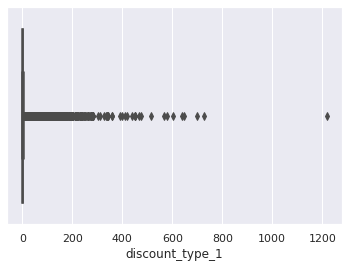

In [38]:
sns.boxplot(transaction['discount_type_1'])

In [39]:
transaction['discount_type_1'].fillna(0,inplace=True)
transaction['discount_type_2'].fillna(0,inplace=True)
transaction['discount_type_3'].fillna(0,inplace=True)

transaction['discount_type_1']=np.where(transaction['discount_type_1']>40,40,
                                       transaction['discount_type_1'])
transaction['discount_type_2']=np.where(transaction['discount_type_2']>40,40,
                                       transaction['discount_type_2'])
transaction['discount_type_3']=np.where(transaction['discount_type_3']>40,40,
                                       transaction['discount_type_3'])

transaction['overall_discount']=transaction['discount_type_1']+transaction['discount_type_2']+transaction['discount_type_3']


In [40]:
transaction=transaction[transaction['category_level_2']<999]
transaction=transaction[transaction['category_level_2']<80]

In [41]:
transaction['category_level_2'].isnull().sum()

0

In [42]:
transaction['category_level_1']=np.where(transaction['category_level_1']>600,400,
                                       transaction['category_level_1'])
transaction['category_level_3']=np.where(transaction['category_level_3']>40,40,
                                       transaction['category_level_3'])
transaction['category_level_4']=np.where(transaction['category_level_4']>30,30,
                                       transaction['category_level_4'])
transaction['overal_category']=transaction['category_level_1']+transaction['category_level_2']+transaction['category_level_3']+transaction['category_level_4']

In [43]:
transaction

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3,date_of_transaction,cardnumber,is_sanal,individualnumber,GecenZaman,siklik,Total,overall_discount,overal_category
0,20120706070177471,400,50,40,15,19.90,2.0,0.0,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359,6460564,39.80,0.00,505
1,20120706070177471,425,30,12,10,3.50,1.0,0.0,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359,6460564,3.50,0.00,477
2,20120706070177471,425,30,12,11,7.90,1.0,0.0,0.0,0.00,2020-12-07,6187974647569015,0,90065509,359,6460564,7.90,0.00,478
3,20122703940031323,103,25,15,10,7.90,2.0,0.0,0.0,0.00,2020-12-27,3587114684567715,0,56076820,339,6460564,15.80,0.00,153
4,20122703940031323,101,15,15,15,16.00,1.0,0.0,0.0,0.00,2020-12-27,3587114684567715,0,56076820,339,6460564,16.00,0.00,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537875,20120839080026509,131,15,15,10,13.00,1.0,0.0,0.0,0.00,2020-12-08,87394648569215,0,92585565,358,6460564,13.00,0.00,171
6537876,20120839080026509,103,35,10,10,2.95,1.0,0.0,0.0,0.00,2020-12-08,87394648569215,0,92585565,358,6460564,2.95,0.00,158
6537878,20120839080026509,131,10,10,20,4.45,1.0,0.0,0.0,0.00,2020-12-08,87394648569215,0,92585565,358,6460564,4.45,0.00,171
6537879,21101831040099839,103,35,10,10,0.01,1.0,0.0,0.0,1.24,2021-10-18,5305272460372214,0,90364853,44,6460564,0.01,1.24,158


In [44]:
transaction["total_price"] = transaction["discount_type_3"]+transaction["discount_type_2"]+transaction["discount_type_1"]+transaction["amount"]
transaction["discount_per3"] = transaction["discount_type_3"] / (transaction["total_price"])
transaction["discount_per2"] = (transaction["discount_type_2"] / transaction["quantity"]) / (transaction["total_price"])
transaction["discount_per1"] = transaction["discount_type_1"] / (transaction["total_price"])
transaction["discount_total"] = transaction["discount_per1"]+transaction["discount_per2"]+transaction["discount_per3"]

In [45]:
transaction

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3,...,GecenZaman,siklik,Total,overall_discount,overal_category,total_price,discount_per3,discount_per2,discount_per1,discount_total
0,20120706070177471,400,50,40,15,19.90,2.0,0.0,0.0,0.00,...,359,6460564,39.80,0.00,505,19.90,0.000,0.0,0.0,0.000
1,20120706070177471,425,30,12,10,3.50,1.0,0.0,0.0,0.00,...,359,6460564,3.50,0.00,477,3.50,0.000,0.0,0.0,0.000
2,20120706070177471,425,30,12,11,7.90,1.0,0.0,0.0,0.00,...,359,6460564,7.90,0.00,478,7.90,0.000,0.0,0.0,0.000
3,20122703940031323,103,25,15,10,7.90,2.0,0.0,0.0,0.00,...,339,6460564,15.80,0.00,153,7.90,0.000,0.0,0.0,0.000
4,20122703940031323,101,15,15,15,16.00,1.0,0.0,0.0,0.00,...,339,6460564,16.00,0.00,146,16.00,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537875,20120839080026509,131,15,15,10,13.00,1.0,0.0,0.0,0.00,...,358,6460564,13.00,0.00,171,13.00,0.000,0.0,0.0,0.000
6537876,20120839080026509,103,35,10,10,2.95,1.0,0.0,0.0,0.00,...,358,6460564,2.95,0.00,158,2.95,0.000,0.0,0.0,0.000
6537878,20120839080026509,131,10,10,20,4.45,1.0,0.0,0.0,0.00,...,358,6460564,4.45,0.00,171,4.45,0.000,0.0,0.0,0.000
6537879,21101831040099839,103,35,10,10,0.01,1.0,0.0,0.0,1.24,...,44,6460564,0.01,1.24,158,1.25,0.992,0.0,0.0,0.992


In [46]:
sonuc1 = transaction.groupby(['individualnumber']).sum()['category_level_2'].reset_index()
sonuc2 = transaction.groupby(['individualnumber']).sum()['overall_discount'].reset_index()
sonuc3 = transaction.groupby(['individualnumber']).sum()['category_level_1'].reset_index()
sonuc4 = transaction.groupby(['individualnumber']).mean()['amount'].reset_index()
sonuc9 = transaction.groupby(['individualnumber']).sum()['overal_category'].reset_index()
'''sonuc6 = transaction.groupby(['individualnumber']).sum()['Skor'].reset_index()
sonuc7 = transaction.groupby(['individualnumber']).sum()['GecenZaman'].reset_index()
sonuc8 = transaction.groupby(['individualnumber']).sum()['customer'].reset_index()'''
sonuc5 = transaction[['individualnumber', 'discount_total']].groupby(['individualnumber'], as_index=False).sum()
sonuc6 = transaction[['individualnumber', 'discount_per1']].groupby(['individualnumber'], as_index=False).sum()
sonuc7 = transaction[['individualnumber', 'discount_per2']].groupby(['individualnumber'], as_index=False).sum()
sonuc8 = transaction[['individualnumber', 'discount_per3']].groupby(['individualnumber'],  as_index=False).sum()

In [47]:
indi = test['individualnumber']

In [48]:
custamer['dateofbirth']=np.where(custamer['dateofbirth']>2004,2004,custamer['dateofbirth'])
custamer['dateofbirth']=np.where(custamer['dateofbirth']<1950,1950,custamer['dateofbirth'])
custamer['dateofbirth']=custamer['dateofbirth'].fillna(custamer['dateofbirth'].median())
custamer['Yas']=2022 - custamer['dateofbirth']
 

In [49]:
transaction.isnull().sum()

basketid               0
category_level_1       0
category_level_2       0
category_level_3       0
category_level_4       0
amount                 0
quantity               0
discount_type_1        0
discount_type_2        0
discount_type_3        0
date_of_transaction    0
cardnumber             0
is_sanal               0
individualnumber       0
GecenZaman             0
siklik                 0
Total                  0
overall_discount       0
overal_category        0
total_price            0
discount_per3          0
discount_per2          0
discount_per1          0
discount_total         0
dtype: int64

In [50]:
train = train.merge(custamer,on='individualnumber',how='left')
train = train.merge(sonuc1,on='individualnumber',how='left')
train = train.merge(sonuc2,on='individualnumber',how='left')
train = train.merge(sonuc3,on='individualnumber',how='left')
train = train.merge(rfm,on='individualnumber',how='left')
train = train.merge(sonuc4,on='individualnumber',how='left')
train = train.merge(sonuc5,on='individualnumber',how='left')
train = train.merge(sonuc6,on='individualnumber',how='left')
train = train.merge(sonuc7,on='individualnumber',how='left')
train = train.merge(sonuc8,on='individualnumber',how='left')
train = train.merge(sonuc9,on='individualnumber',how='left')
train = train.merge(genel_katagori,on='category_number',how='left')

test = test.merge(custamer,on='individualnumber',how='left')
test = test.merge(sonuc1,on='individualnumber',how='left')
test = test.merge(sonuc2,on='individualnumber',how='left')
test = test.merge(sonuc3,on='individualnumber',how='left')
test = test.merge(rfm,on='individualnumber',how='left')
test = test.merge(sonuc4,on='individualnumber',how='left')
test = test.merge(sonuc5,on='individualnumber',how='left')
test = test.merge(sonuc6,on='individualnumber',how='left')
test = test.merge(sonuc7,on='individualnumber',how='left')
test = test.merge(sonuc8,on='individualnumber',how='left')
test = test.merge(sonuc9,on='individualnumber',how='left')
test = test.merge(genel_katagori,on='category_number',how='left')


In [51]:
test.shape

(13236, 19)

In [52]:
train.shape

(13115, 20)

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["gender"] = le.fit_transform(train["gender"])
test["gender"] = le.fit_transform(test["gender"])

train["genel_kategori"] = le.fit_transform(train["genel_kategori"])
test["genel_kategori"] = le.fit_transform(test["genel_kategori"])

In [54]:
train

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,city_code,dateofbirth,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori
0,94230288,9000,21.0,2.0,0,0,6,1983.0,39.0,10232.0,401.862341,104068.0,4.18,16.323539,13.711563,2.580681,4.327934,6.802947,125842.0,3
1,4684087,9000,17.0,1.0,0,0,76,1951.0,71.0,3443.0,761.563255,30070.0,2.92,51.958062,11.230097,1.453278,2.828315,6.948504,38289.0,3
2,92472145,9058,24.0,3.0,0,1,78,1982.0,40.0,41433.0,4298.849379,309955.0,4.99,17.461722,388.588608,79.571481,24.879900,284.137226,394603.0,1
3,88026681,9030,22.0,2.0,0,1,81,1961.0,61.0,6431.0,278.022566,61891.0,3.83,23.349167,7.636475,1.095477,1.482360,5.058638,79143.0,4
4,98127795,9001,38.0,3.0,0,0,9,1984.0,38.0,720.0,10.200000,4702.0,1.33,11.811905,0.484523,0.000000,0.000000,0.484523,6077.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,1,81,1997.0,25.0,26216.0,1687.168934,175871.0,4.79,7.420156,320.665340,8.606986,41.768220,270.290134,223856.0,2
13111,96841665,9004,65.0,6.0,0,0,6,1971.0,51.0,6285.0,563.132551,74071.0,3.52,23.501053,17.721967,5.700451,7.559043,4.462473,88475.0,1
13112,98445787,9044,33.0,3.0,0,1,52,1975.0,47.0,2949.0,482.599528,29238.0,3.60,13.675692,17.084149,1.562642,3.279188,12.242319,36566.0,1
13113,13781030,9004,66.0,6.0,0,0,60,1981.0,41.0,1207.0,31.310000,9240.0,2.53,15.298864,1.486730,0.000000,1.036573,0.450157,11908.0,1


In [55]:
test.isnull().sum()

individualnumber     0
category_number      0
hakkedis_amt         0
odul_amt             0
gender               0
city_code            0
dateofbirth          0
Yas                  0
category_level_2    25
overall_discount    25
category_level_1    25
RFM_Score           11
amount              25
discount_total      25
discount_per1       25
discount_per2       25
discount_per3       25
overal_category     25
genel_kategori       0
dtype: int64

In [56]:
train

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,city_code,dateofbirth,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori
0,94230288,9000,21.0,2.0,0,0,6,1983.0,39.0,10232.0,401.862341,104068.0,4.18,16.323539,13.711563,2.580681,4.327934,6.802947,125842.0,3
1,4684087,9000,17.0,1.0,0,0,76,1951.0,71.0,3443.0,761.563255,30070.0,2.92,51.958062,11.230097,1.453278,2.828315,6.948504,38289.0,3
2,92472145,9058,24.0,3.0,0,1,78,1982.0,40.0,41433.0,4298.849379,309955.0,4.99,17.461722,388.588608,79.571481,24.879900,284.137226,394603.0,1
3,88026681,9030,22.0,2.0,0,1,81,1961.0,61.0,6431.0,278.022566,61891.0,3.83,23.349167,7.636475,1.095477,1.482360,5.058638,79143.0,4
4,98127795,9001,38.0,3.0,0,0,9,1984.0,38.0,720.0,10.200000,4702.0,1.33,11.811905,0.484523,0.000000,0.000000,0.484523,6077.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,1,81,1997.0,25.0,26216.0,1687.168934,175871.0,4.79,7.420156,320.665340,8.606986,41.768220,270.290134,223856.0,2
13111,96841665,9004,65.0,6.0,0,0,6,1971.0,51.0,6285.0,563.132551,74071.0,3.52,23.501053,17.721967,5.700451,7.559043,4.462473,88475.0,1
13112,98445787,9044,33.0,3.0,0,1,52,1975.0,47.0,2949.0,482.599528,29238.0,3.60,13.675692,17.084149,1.562642,3.279188,12.242319,36566.0,1
13113,13781030,9004,66.0,6.0,0,0,60,1981.0,41.0,1207.0,31.310000,9240.0,2.53,15.298864,1.486730,0.000000,1.036573,0.450157,11908.0,1


In [57]:
nan_degeri_sil(test)
nan_degeri_sil(train)

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,city_code,dateofbirth,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori
0,94230288,9000,21.0,2.0,0,0,6,1983.0,39.0,10232.0,401.862341,104068.0,4.18,16.323539,13.711563,2.580681,4.327934,6.802947,125842.0,3
1,4684087,9000,17.0,1.0,0,0,76,1951.0,71.0,3443.0,761.563255,30070.0,2.92,51.958062,11.230097,1.453278,2.828315,6.948504,38289.0,3
2,92472145,9058,24.0,3.0,0,1,78,1982.0,40.0,41433.0,4298.849379,309955.0,4.99,17.461722,388.588608,79.571481,24.879900,284.137226,394603.0,1
3,88026681,9030,22.0,2.0,0,1,81,1961.0,61.0,6431.0,278.022566,61891.0,3.83,23.349167,7.636475,1.095477,1.482360,5.058638,79143.0,4
4,98127795,9001,38.0,3.0,0,0,9,1984.0,38.0,720.0,10.200000,4702.0,1.33,11.811905,0.484523,0.000000,0.000000,0.484523,6077.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,1,81,1997.0,25.0,26216.0,1687.168934,175871.0,4.79,7.420156,320.665340,8.606986,41.768220,270.290134,223856.0,2
13111,96841665,9004,65.0,6.0,0,0,6,1971.0,51.0,6285.0,563.132551,74071.0,3.52,23.501053,17.721967,5.700451,7.559043,4.462473,88475.0,1
13112,98445787,9044,33.0,3.0,0,1,52,1975.0,47.0,2949.0,482.599528,29238.0,3.60,13.675692,17.084149,1.562642,3.279188,12.242319,36566.0,1
13113,13781030,9004,66.0,6.0,0,0,60,1981.0,41.0,1207.0,31.310000,9240.0,2.53,15.298864,1.486730,0.000000,1.036573,0.450157,11908.0,1


In [58]:
test.isnull().sum()

individualnumber    0
category_number     0
hakkedis_amt        0
odul_amt            0
gender              0
city_code           0
dateofbirth         0
Yas                 0
category_level_2    0
overall_discount    0
category_level_1    0
RFM_Score           0
amount              0
discount_total      0
discount_per1       0
discount_per2       0
discount_per3       0
overal_category     0
genel_kategori      0
dtype: int64

In [59]:
train.isnull().sum()

individualnumber    0
category_number     0
hakkedis_amt        0
odul_amt            0
response            0
gender              0
city_code           0
dateofbirth         0
Yas                 0
category_level_2    0
overall_discount    0
category_level_1    0
RFM_Score           0
amount              0
discount_total      0
discount_per1       0
discount_per2       0
discount_per3       0
overal_category     0
genel_kategori      0
dtype: int64

In [60]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
individualnumber,13115.0,9.020365e+07,2.100606e+07,452480.000000,9.348096e+07,9.636461e+07,9.944176e+07,1.022808e+08
category_number,13115.0,9.029460e+03,1.772443e+01,9000.000000,9.017000e+03,9.032000e+03,9.046000e+03,9.061000e+03
hakkedis_amt,13115.0,4.005421e+01,2.583906e+01,7.000000,2.000000e+01,3.200000e+01,5.400000e+01,1.800000e+02
odul_amt,13115.0,3.679832e+00,2.675766e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,2.000000e+01
response,13115.0,1.593595e-02,1.252326e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gender,13115.0,4.703012e-01,4.992890e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
city_code,13115.0,5.376676e+01,2.902646e+01,0.000000,2.700000e+01,6.900000e+01,7.800000e+01,8.100000e+01
dateofbirth,13115.0,1.980293e+03,1.354805e+01,1950.000000,1.971000e+03,1.982000e+03,1.991000e+03,2.004000e+03
Yas,13115.0,4.170728e+01,1.354805e+01,18.000000,3.100000e+01,4.000000e+01,5.100000e+01,7.200000e+01
category_level_2,13115.0,4.771027e+03,8.187718e+03,1.000000,4.800000e+02,1.659000e+03,5.292500e+03,1.400160e+05


In [61]:
del train['dateofbirth']
del test['dateofbirth']

In [62]:
train

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,city_code,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori
0,94230288,9000,21.0,2.0,0,0,6,39.0,10232.0,401.862341,104068.0,4.18,16.323539,13.711563,2.580681,4.327934,6.802947,125842.0,3
1,4684087,9000,17.0,1.0,0,0,76,71.0,3443.0,761.563255,30070.0,2.92,51.958062,11.230097,1.453278,2.828315,6.948504,38289.0,3
2,92472145,9058,24.0,3.0,0,1,78,40.0,41433.0,4298.849379,309955.0,4.99,17.461722,388.588608,79.571481,24.879900,284.137226,394603.0,1
3,88026681,9030,22.0,2.0,0,1,81,61.0,6431.0,278.022566,61891.0,3.83,23.349167,7.636475,1.095477,1.482360,5.058638,79143.0,4
4,98127795,9001,38.0,3.0,0,0,9,38.0,720.0,10.200000,4702.0,1.33,11.811905,0.484523,0.000000,0.000000,0.484523,6077.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,1,81,25.0,26216.0,1687.168934,175871.0,4.79,7.420156,320.665340,8.606986,41.768220,270.290134,223856.0,2
13111,96841665,9004,65.0,6.0,0,0,6,51.0,6285.0,563.132551,74071.0,3.52,23.501053,17.721967,5.700451,7.559043,4.462473,88475.0,1
13112,98445787,9044,33.0,3.0,0,1,52,47.0,2949.0,482.599528,29238.0,3.60,13.675692,17.084149,1.562642,3.279188,12.242319,36566.0,1
13113,13781030,9004,66.0,6.0,0,0,60,41.0,1207.0,31.310000,9240.0,2.53,15.298864,1.486730,0.000000,1.036573,0.450157,11908.0,1


In [63]:
train.loc[(train['hakkedis_amt']<=17),'hakkedis_amt']=0
train.loc[(train['hakkedis_amt']<=28) & (train['hakkedis_amt']>17),'hakkedis_amt']=0
train.loc[(train['hakkedis_amt']<=39) & (train['hakkedis_amt']>28),'hakkedis_amt']=2
train.loc[(train['hakkedis_amt']<=50) & (train['hakkedis_amt']>39),'hakkedis_amt']=3
train.loc[(train['hakkedis_amt']<=61) & (train['hakkedis_amt']>50),'hakkedis_amt']=4
train.loc[(train['hakkedis_amt']<=72) & (train['hakkedis_amt']>61),'hakkedis_amt']=5
train.loc[(train['hakkedis_amt']<=84) & (train['hakkedis_amt']>72),'hakkedis_amt']=6
train.loc[(train['hakkedis_amt']<=97) & (train['hakkedis_amt']>84),'hakkedis_amt']=7
train.loc[(train['hakkedis_amt']<=110) & (train['hakkedis_amt']>97),'hakkedis_amt']=8
train.loc[(train['hakkedis_amt']<=121) & (train['hakkedis_amt']>110),'hakkedis_amt']=9
train.loc[(train['hakkedis_amt']<=180) & (train['hakkedis_amt']>121),'hakkedis_amt']=10

In [64]:
test.loc[(test['hakkedis_amt']<=17),'hakkedis_amt']=0
test.loc[(test['hakkedis_amt']<=28) & (test['hakkedis_amt']>17),'hakkedis_amt']=0
test.loc[(test['hakkedis_amt']<=39) & (test['hakkedis_amt']>28),'hakkedis_amt']=2
test.loc[(test['hakkedis_amt']<=50) & (test['hakkedis_amt']>39),'hakkedis_amt']=3
test.loc[(test['hakkedis_amt']<=61) & (test['hakkedis_amt']>50),'hakkedis_amt']=4
test.loc[(test['hakkedis_amt']<=72) & (test['hakkedis_amt']>61),'hakkedis_amt']=5
test.loc[(test['hakkedis_amt']<=84) & (test['hakkedis_amt']>72),'hakkedis_amt']=6
test.loc[(test['hakkedis_amt']<=97) & (test['hakkedis_amt']>84),'hakkedis_amt']=7
test.loc[(test['hakkedis_amt']<=110) & (test['hakkedis_amt']>97),'hakkedis_amt']=8
test.loc[(test['hakkedis_amt']<=121) & (test['hakkedis_amt']>110),'hakkedis_amt']=9
test.loc[(test['hakkedis_amt']<=180) & (test['hakkedis_amt']>121),'hakkedis_amt']=10

In [65]:
train['RFM_OVERAL']=train['RFM_Score']+train['overall_discount']
test['RFM_OVERAL']=test['RFM_Score']+test['overall_discount']

In [66]:
train["try1"] = ((train["RFM_Score"])*train["overall_discount"])*train["odul_amt"]
train["try2"] = ((train["RFM_Score"])*train["discount_total"])*train["odul_amt"]
train["try3"] = ((train["RFM_Score"])*train["discount_per1"])*train["odul_amt"]
train["try4"] = ((train["RFM_Score"])*train["discount_per2"])*train["odul_amt"]
train["try5"] = ((train["RFM_Score"])*train["discount_per3"])*train["odul_amt"]

test["try1"] = ((test["RFM_Score"])*test["overall_discount"])*test["odul_amt"]
test["try2"] = ((test["RFM_Score"])*test["discount_total"])*test["odul_amt"]
test["try3"] = ((test["RFM_Score"])*test["discount_per1"])*test["odul_amt"]
test["try4"] = ((test["RFM_Score"])*test["discount_per2"])*test["odul_amt"]
test["try5"] = ((test["RFM_Score"])*test["discount_per3"])*test["odul_amt"]

In [67]:
response=train[['response']]

In [68]:
train.drop(columns='response',axis=1,inplace=True)

In [69]:
train=train.join(response)

In [70]:
train

,individualnumber,category_number,hakkedis_amt,odul_amt,gender,city_code,Yas,category_level_2,overall_discount,category_level_1,...,discount_per3,overal_category,genel_kategori,RFM_OVERAL,try1,try2,try3,try4,try5,response
0,94230288,9000,0.0,2.0,0,6,39.0,10232.0,401.862341,104068.0,...,6.802947,125842.0,3,406.042341,3359.569175,114.628664,21.574491,36.181531,56.872641,0
1,4684087,9000,0.0,1.0,0,76,71.0,3443.0,761.563255,30070.0,...,6.948504,38289.0,3,764.483255,2223.764706,32.791882,4.243572,8.258680,20.289630,0
2,92472145,9058,0.0,3.0,1,78,40.0,41433.0,4298.849379,309955.0,...,284.137226,394603.0,1,4303.839379,64353.775197,5817.171455,1191.185076,372.452104,4253.534274,0
3,88026681,9030,0.0,2.0,1,81,61.0,6431.0,278.022566,61891.0,...,5.058638,79143.0,4,281.852566,2129.652855,58.495400,8.391355,11.354881,38.749164,0
4,98127795,9001,2.0,3.0,0,9,38.0,720.0,10.200000,4702.0,...,0.484523,6077.0,1,11.530000,40.698000,1.933246,0.000000,0.000000,1.933246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,0.0,2.0,1,81,25.0,26216.0,1687.168934,175871.0,...,270.290134,223856.0,2,1691.958934,16163.078391,3071.973957,82.454921,400.139550,2589.379485,0
13111,96841665,9004,5.0,6.0,0,6,51.0,6285.0,563.132551,74071.0,...,4.462473,88475.0,1,566.652551,11893.359471,374.287937,120.393519,159.646993,94.247426,0
13112,98445787,9044,2.0,3.0,1,52,47.0,2949.0,482.599528,29238.0,...,12.242319,36566.0,1,486.199528,5212.074901,184.508810,16.876533,35.415234,132.217043,0
13113,13781030,9004,5.0,6.0,0,60,41.0,1207.0,31.310000,9240.0,...,0.450157,11908.0,1,33.840000,475.285800,22.568559,0.000000,15.735179,6.833379,0


In [71]:
'''model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['overall_discount']])
train['scores']=model.decision_function(train[['overall_discount']])
train['anomaly']=model.predict(train[['overall_discount']])

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['overall_discount']])
test['scores']=model.decision_function(test[['overall_discount']])
test['anomaly']=model.predict(test[['overall_discount']])'''

'''model.fit(train[['try1']])
train['try1_scor']=model.decision_function(train[['try1']])
train['try1_anomali']=model.predict(train[['try1']])

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(train[['try1']])
test['try1_scor']=model.decision_function(test[['try1']])
test['try1_anomali']=model.predict(test[['try1']])'''

"model.fit(train[['try1']])\ntrain['try1_scor']=model.decision_function(train[['try1']])\ntrain['try1_anomali']=model.predict(train[['try1']])\n\nmodel=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)\nmodel.fit(train[['try1']])\ntest['try1_scor']=model.decision_function(test[['try1']])\ntest['try1_anomali']=model.predict(test[['try1']])"

In [72]:
'''train.loc[(train['anomaly']==-1),'overall_discount']=train['overall_discount'].median()
test.loc[(test['anomaly']==-1),'overall_discount']=test['overall_discount'].median()

train.loc[(train['per1_anomali']==-1),'discount_per1']=train['discount_per1'].median()
test.loc[(test['per1_anomali']==-1),'discount_per1']=test['discount_per1'].median()'''

"train.loc[(train['anomaly']==-1),'overall_discount']=train['overall_discount'].median()\ntest.loc[(test['anomaly']==-1),'overall_discount']=test['overall_discount'].median()\n\ntrain.loc[(train['per1_anomali']==-1),'discount_per1']=train['discount_per1'].median()\ntest.loc[(test['per1_anomali']==-1),'discount_per1']=test['discount_per1'].median()"

In [73]:
train['RFM_Score']

0        4.18
1        2.92
2        4.99
3        3.83
4        1.33
         ... 
13110    4.79
13111    3.52
13112    3.60
13113    2.53
13114    0.67
Name: RFM_Score, Length: 13115, dtype: float64

In [74]:
a=train[['RFM_Score', "discount_total", 'response']].groupby(['RFM_Score', "discount_total"], as_index=False).mean().sort_values(by='response', ascending = False)

In [75]:
#pd.options.display.max_rows=397

In [76]:
cor_train=train.corr()
cor_train.style.background_gradient(cmap='coolwarm')

,individualnumber,category_number,hakkedis_amt,odul_amt,gender,city_code,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori,RFM_OVERAL,try1,try2,try3,try4,try5,response
individualnumber,1.000000,0.021322,0.074345,0.037902,0.047548,-0.024702,-0.253135,-0.209597,-0.222042,-0.210203,-0.246348,-0.005153,-0.180511,-0.183404,-0.212749,-0.129683,-0.210976,-0.008585,-0.222304,-0.148728,-0.140563,-0.144453,-0.166566,-0.103357,-0.105455
category_number,0.021322,1.000000,0.375902,0.384415,0.010567,-0.031416,-0.010965,-0.023708,-0.016608,-0.021137,-0.077341,0.027057,-0.012210,-0.012166,-0.017959,-0.007608,-0.021554,-0.267713,-0.016750,0.024760,0.027479,0.018957,0.037479,0.023714,-0.025876
hakkedis_amt,0.074345,0.375902,1.000000,0.960516,-0.020552,-0.051342,-0.044374,-0.123299,-0.050090,-0.114957,-0.273486,0.085617,-0.077842,-0.041878,-0.102695,-0.071868,-0.116196,-0.082660,-0.050603,0.105288,0.077765,0.075652,0.076490,0.065638,0.020873
odul_amt,0.037902,0.384415,0.960516,1.000000,-0.019304,-0.034822,-0.024411,0.009209,0.072832,0.018543,-0.182544,0.089742,0.027229,0.057389,0.007107,0.012810,0.017788,-0.099179,0.072369,0.246493,0.212719,0.198945,0.218167,0.180800,0.061195
gender,0.047548,0.010567,-0.020552,-0.019304,1.000000,0.054303,-0.088239,0.047885,0.021325,0.054152,0.046656,-0.048544,0.025288,0.010538,0.040407,0.022374,0.053517,0.004775,0.021398,0.008435,0.009760,0.005234,0.023111,0.005549,-0.008894
city_code,-0.024702,-0.031416,-0.051342,-0.034822,0.054303,1.000000,0.005778,0.097487,0.075341,0.105217,0.113766,-0.007906,0.072226,0.068924,0.096435,0.050104,0.104736,0.000831,0.075493,0.049032,0.054421,0.049156,0.068661,0.042357,0.010924
Yas,-0.253135,-0.010965,-0.044374,-0.024411,-0.088239,0.005778,1.000000,0.081865,0.079283,0.101338,0.111987,0.031020,0.036073,0.036880,0.087621,0.009130,0.098906,-0.003416,0.079427,0.047698,0.030167,0.031296,0.061623,0.012111,0.013941
category_level_2,-0.209597,-0.023708,-0.123299,0.009209,0.047885,0.097487,0.081865,1.000000,0.753669,0.983240,0.696895,-0.035777,0.794469,0.693509,0.827117,0.672009,0.987314,0.013369,0.754267,0.559219,0.649538,0.570170,0.687407,0.565685,0.202933
overall_discount,-0.222042,-0.016608,-0.050090,0.072832,0.021325,0.075341,0.079283,0.753669,1.000000,0.748647,0.543225,0.015427,0.805519,0.807911,0.698771,0.676848,0.752664,0.026991,0.999998,0.838672,0.721512,0.730258,0.626899,0.624315,0.350528
category_level_1,-0.210203,-0.021137,-0.114957,0.018543,0.054152,0.105217,0.101338,0.983240,0.748647,1.000000,0.679128,-0.032445,0.769626,0.686194,0.831761,0.632022,0.999647,0.009761,0.749214,0.558181,0.634570,0.566007,0.691809,0.539685,0.201230


In [77]:
df_ones = train[train["response"]==1]
df_zeros = train[train["response"]==0]
df_ones = df_ones[["RFM_Score", "overall_discount",'amount',
                    "discount_per1", "discount_per2",
                    "discount_per3"]]
df_zeros = df_zeros[["RFM_Score","overall_discount",'amount',
                    "discount_per1", "discount_per2",
                    "discount_per3"]]
df_ones.shape

(209, 6)

In [78]:
'''train=train[~((train['response']==0) & (train['discount_total']>200) & (train['RFM_Score']>3))]
train=train[~((train['response']==1) & (train['discount_total']<200) & (train['RFM_Score']<2))]
train=train[~((train['response']==1) & (train['overall_discount']<200) & (train['RFM_Score']<3))]
train=train[~((train['response']==0) & (train['overall_discount']>10000) & (train['RFM_Score']>3))]
train=train[~((train['response']==1) & (train['overall_discount']<400) & (train['RFM_Score']<3))]

train=train[~((train['response']==1) & (train['overall_discount']<100) & (train['RFM_Score']<=2))]

train=train[~((train['response']==1) & (train['discount_per1']<70) & (train['RFM_Score']<3))]

train=train[~((train['response']==0) & (train['discount_per1']>80) & (train['RFM_Score']>3))]
train=train[~((train['response']==0) & (train['overall_discount']>700) & (train['RFM_Score']==5))]
train=train[~((train['response']==0) & (train['discount_per3']>95) & (train['RFM_Score']>4))]
train=train[~((train['response']==0) & (train['overall_discount']>1400) & (train['RFM_Score']>3))]'''

"train=train[~((train['response']==0) & (train['discount_total']>200) & (train['RFM_Score']>3))]\ntrain=train[~((train['response']==1) & (train['discount_total']<200) & (train['RFM_Score']<2))]\ntrain=train[~((train['response']==1) & (train['overall_discount']<200) & (train['RFM_Score']<3))]\ntrain=train[~((train['response']==0) & (train['overall_discount']>10000) & (train['RFM_Score']>3))]\ntrain=train[~((train['response']==1) & (train['overall_discount']<400) & (train['RFM_Score']<3))]\n\ntrain=train[~((train['response']==1) & (train['overall_discount']<100) & (train['RFM_Score']<=2))]\n\ntrain=train[~((train['response']==1) & (train['discount_per1']<70) & (train['RFM_Score']<3))]\n\ntrain=train[~((train['response']==0) & (train['discount_per1']>80) & (train['RFM_Score']>3))]\ntrain=train[~((train['response']==0) & (train['overall_discount']>700) & (train['RFM_Score']==5))]\ntrain=train[~((train['response']==0) & (train['discount_per3']>95) & (train['RFM_Score']>4))]\ntrain=train[~((

In [79]:
train=train[~((train['response']==0) & (train['discount_total']>200))]
train=train[~((train['response']==0) & (train['discount_total']>300) & (train['RFM_Score']>3))]
train=train[~((train['response']==1) & (train['discount_total']<200) & (train['RFM_Score']<2))]
train=train[~((train['response']==1) & (train['overall_discount']<200) & (train['RFM_Score']==2))]
train=train[~((train['response']==0) & (train['overall_discount']>10000) & (train['RFM_Score']>3))]
train=train[~((train['response']==1) & (train['overall_discount']<400) & (train['RFM_Score']<3))]
train=train[~((train['response']==1) & (train['overall_discount']>600) & (train['RFM_Score']==2))]
train=train[~((train['response']==1) & (train['overall_discount']<100) & (train['RFM_Score']==1))]
train=train[~((train['response']==1) & (train['overall_discount']<100) & (train['RFM_Score']==2))]
train=train[~((train['response']==0) & (train['overall_discount']>900) & (train['RFM_Score']==3))]
train=train[~((train['response']==1) & (train['discount_per1']<100) & (train['RFM_Score']==2))]
train=train[~((train['response']==1) & (train['discount_per1']<50) & (train['RFM_Score']<3))]
train=train[~((train['response']==0) & (train['discount_per1']>90) & (train['RFM_Score']>3))]
train=train[~((train['response']==0) & (train['overall_discount']>700) & (train['RFM_Score']==5))]
train=train[~((train['response']==0) & (train['discount_per3']>95) & (train['RFM_Score']>4))]
train=train[~((train['response']==0) & (train['overall_discount']>2500) & (train['RFM_Score']>4))]
train=train[~((train['response']==1) & (train['overall_discount']<500) & (train['RFM_Score']<4))]

In [80]:
#train=train[~((train['response']==1) & (train['RFM_Score']>=2.92)& (train['amount']>=51))]
#train=train[~((train['response']==0) & (train['RFM_Score']>3)& (train['discount_per3']>100))]

In [81]:
train['discount_per2'].max()

243.3779638761337

In [82]:
train[((train['response']==0) & (train['discount_per2']>200))]

,individualnumber,category_number,hakkedis_amt,odul_amt,gender,city_code,Yas,category_level_2,overall_discount,category_level_1,...,discount_per3,overal_category,genel_kategori,RFM_OVERAL,try1,try2,try3,try4,try5,response


In [83]:
'''pd.options.display.max_rows=13114
df_zeros'''

'pd.options.display.max_rows=13114\ndf_zeros'

In [84]:
cor_train=train.corr()
cor_train.style.background_gradient(cmap='coolwarm')

,individualnumber,category_number,hakkedis_amt,odul_amt,gender,city_code,Yas,category_level_2,overall_discount,category_level_1,RFM_Score,amount,discount_total,discount_per1,discount_per2,discount_per3,overal_category,genel_kategori,RFM_OVERAL,try1,try2,try3,try4,try5,response
individualnumber,1.000000,0.021266,0.074042,0.041185,0.047022,-0.024148,-0.250875,-0.209538,-0.235953,-0.210412,-0.241294,-0.005010,-0.197963,-0.186632,-0.212722,-0.151386,-0.211290,-0.009316,-0.236224,-0.154501,-0.138191,-0.138109,-0.161831,-0.100929,-0.114770
category_number,0.021266,1.000000,0.381517,0.389736,0.008416,-0.032063,-0.011521,-0.034036,-0.032416,-0.030998,-0.083003,0.027838,-0.028489,-0.024154,-0.025431,-0.025881,-0.031578,-0.270348,-0.032583,0.022839,0.022319,0.012744,0.035632,0.018239,-0.017569
hakkedis_amt,0.074042,0.381517,1.000000,0.962589,-0.020419,-0.050190,-0.044449,-0.129291,-0.061874,-0.120375,-0.276146,0.083940,-0.085413,-0.041302,-0.107062,-0.082628,-0.121766,-0.084894,-0.062499,0.110348,0.084783,0.078169,0.078501,0.074666,0.015719
odul_amt,0.041185,0.389736,0.962589,1.000000,-0.020115,-0.035593,-0.025303,-0.003990,0.056514,0.006566,-0.193788,0.087882,0.017688,0.050180,-0.006204,0.004323,0.005545,-0.102490,0.055925,0.249337,0.212533,0.190466,0.211188,0.184569,0.063305
gender,0.047022,0.008416,-0.020419,-0.020115,1.000000,0.054403,-0.089165,0.046011,0.022860,0.053178,0.047107,-0.048563,0.030139,0.009780,0.037326,0.032313,0.052432,0.004023,0.022948,0.006904,0.009301,0.001886,0.019328,0.007851,-0.001250
city_code,-0.024148,-0.032063,-0.050190,-0.035593,0.054403,1.000000,0.005419,0.100088,0.080438,0.107976,0.111877,-0.007508,0.077256,0.067175,0.097954,0.055707,0.107522,0.003563,0.080607,0.050138,0.051466,0.042646,0.066727,0.040330,0.014967
Yas,-0.250875,-0.011521,-0.044449,-0.025303,-0.089165,0.005419,1.000000,0.093373,0.097281,0.112931,0.114394,0.031088,0.059433,0.046419,0.098173,0.035597,0.110486,-0.003157,0.097432,0.056502,0.040792,0.035046,0.066361,0.025554,0.012352
category_level_2,-0.209538,-0.034036,-0.129291,-0.003990,0.046011,0.100088,0.093373,1.000000,0.765155,0.983159,0.712107,-0.038024,0.797209,0.660431,0.810440,0.687299,0.987217,0.015155,0.765852,0.566206,0.611371,0.526322,0.667614,0.519178,0.276644
overall_discount,-0.235953,-0.032416,-0.061874,0.056514,0.022860,0.080438,0.097281,0.765155,1.000000,0.761850,0.579961,0.007386,0.855864,0.841758,0.711354,0.728742,0.765485,0.030402,0.999998,0.818194,0.723255,0.739780,0.639024,0.604757,0.516057
category_level_1,-0.210412,-0.030998,-0.120375,0.006566,0.053178,0.107976,0.112931,0.983159,0.761850,1.000000,0.695699,-0.034634,0.780590,0.654303,0.815422,0.658166,0.999651,0.012265,0.762509,0.567722,0.603796,0.525209,0.673095,0.503641,0.274797


In [85]:
train.drop(columns=['category_level_1','category_number','hakkedis_amt','gender','odul_amt','RFM_OVERAL','overall_discount','Yas','city_code','overal_category','try1','discount_per2','genel_kategori','discount_total','discount_per3'],axis=1,inplace=True)
test.drop(columns=['category_level_1','category_number','hakkedis_amt','gender','odul_amt','RFM_OVERAL','overall_discount','Yas','city_code','overal_category','try1','discount_per2','genel_kategori','discount_total','discount_per3'],axis=1,inplace=True)

In [86]:
#train['discount_per1'].value_counts()

In [87]:
'''pt = PowerTransformer()
train["overall_discount"] = pt.fit_transform(train[["overall_discount"]])'''
'''train["date_of_transaction"] = pt.fit_transform(train[["date_of_transaction"]])
train["amount"] = pt.fit_transform(train[["amount"]])
train["discount_type_2"] = pt.fit_transform(train[["discount_type_2"]])
train["category_level_1"] = pt.fit_transform(train[["category_level_1"]])
train["category_level_4"] = pt.fit_transform(train[["category_level_4"]])
train["shop_days"] = pt.fit_transform(train[["shop_days"]])
train["qual"] = pt.fit_transform(train[["qual"]])'''

'train["date_of_transaction"] = pt.fit_transform(train[["date_of_transaction"]])\ntrain["amount"] = pt.fit_transform(train[["amount"]])\ntrain["discount_type_2"] = pt.fit_transform(train[["discount_type_2"]])\ntrain["category_level_1"] = pt.fit_transform(train[["category_level_1"]])\ntrain["category_level_4"] = pt.fit_transform(train[["category_level_4"]])\ntrain["shop_days"] = pt.fit_transform(train[["shop_days"]])\ntrain["qual"] = pt.fit_transform(train[["qual"]])'

In [88]:
'''pt = PowerTransformer()
test["overall_discount"] = pt.fit_transform(test[["overall_discount"]])'''
'''test["date_of_transaction"] = pt.fit_transform(test[["date_of_transaction"]])
test["amount"] = pt.fit_transform(test[["amount"]])
test["discount_type_2"] = pt.fit_transform(test[["discount_type_2"]])
test["category_level_1"] = pt.fit_transform(test[["category_level_1"]])
test["category_level_4"] = pt.fit_transform(test[["category_level_4"]])
test["shop_days"] = pt.fit_transform(test[["shop_days"]])
test["qual"] = pt.fit_transform(test[["qual"]])'''

'test["date_of_transaction"] = pt.fit_transform(test[["date_of_transaction"]])\ntest["amount"] = pt.fit_transform(test[["amount"]])\ntest["discount_type_2"] = pt.fit_transform(test[["discount_type_2"]])\ntest["category_level_1"] = pt.fit_transform(test[["category_level_1"]])\ntest["category_level_4"] = pt.fit_transform(test[["category_level_4"]])\ntest["shop_days"] = pt.fit_transform(test[["shop_days"]])\ntest["qual"] = pt.fit_transform(test[["qual"]])'

In [89]:
#train=pd.get_dummies(train,columns=['gender','Yas','genel_kategori','hakkedis_amt'],drop_first=True)
#test=pd.get_dummies(test,columns=['gender','Yas','genel_kategori','hakkedis_amt'],drop_first=True)

In [90]:
df_submission=test

In [91]:
test.shape

(13236, 9)

In [92]:
train.shape

(12924, 10)

In [93]:
X = train.drop(['response','individualnumber'], axis = 'columns')
y = train['response']

In [94]:
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [95]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import cv
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 10)

In [96]:
from numpy import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.datasets import make_gaussian_quantiles

model = xgb.XGBClassifier(n_estimators = 4000,
                            #scale_pos_weight=98,
                            learning_rate = 0.3,
                            objective = 'binary:logistic',
                            min_split_loss = 0.02,
                            max_depth = 4,
                            reg_alpha = 3,
                            reg_lambda = 0.5,
                            subsample = 0.9,
                            min_child_weight = 3,
                            colsample_bytree = 0.4,
                            gamma = 5,
                            random_state = 50)

over = SVMSMOTE(sampling_strategy=0.03, k_neighbors=7)
under = RandomUnderSampler(sampling_strategy=0.15)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = mean(scores)
print('> k=%d, Mean F1: %.3f' % (7, score))

model.fit(X, y, eval_metric=f1_eval)

> k=7, Mean F1: 0.471


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
              min_split_loss=0.02, missing=nan, monotone_constraints='()',
              n_estimators=4000, n_jobs=0, num_parallel_tree=1,
              predictor='auto', random_state=50, reg_alpha=3, ...)

In [97]:
ID = test["individualnumber"]
test = test.drop("individualnumber", axis=1)

In [98]:
pred = model.predict(test)

In [99]:
df_sub = pd.DataFrame({"individualnumber":ID, "response":pred})
df_sub

,individualnumber,response
0,95812936,0
1,23929570,0
2,95948115,0
3,100898513,0
4,12769156,1
...,...,...
13231,93418529,0
13232,97397069,0
13233,95212479,0
13234,93406449,0


In [100]:
df_sub.response.value_counts()

0    13087
1      149
Name: response, dtype: int64

In [101]:
df_sub.to_csv("submission.csv", index=False)

In [102]:
df_submission["response"] = df_sub["response"]
df_submission

,individualnumber,category_level_2,RFM_Score,amount,discount_per1,try2,try3,try4,try5,response
0,95812936,1175.0,1.29,52.178571,0.319149,5.105106,1.235106,0.000000,3.870000,0
1,23929570,1065.0,2.34,21.747500,1.803955,38.626987,8.442510,15.758513,14.425964,0
2,95948115,460.0,1.04,23.607895,1.924044,5.796522,4.002012,0.637415,1.157095,0
3,100898513,6599.0,3.54,24.954250,11.778280,295.810319,166.780439,28.942967,100.086913,0
4,12769156,42425.0,4.88,19.541683,53.075848,1868.325834,777.030421,486.975797,604.319616,1
...,...,...,...,...,...,...,...,...,...,...
13231,93418529,6368.0,3.57,12.925862,1.260728,291.072238,13.502399,77.483939,200.085901,0
13232,97397069,435.0,1.53,9.175652,0.000000,1.405090,0.000000,0.640917,0.764173,0
13233,95212479,525.0,1.16,22.062667,0.000000,26.501156,0.000000,1.903100,24.598056,0
13234,93406449,1860.0,2.68,19.196308,1.672752,58.152428,13.448925,9.100330,35.603173,0


In [103]:
test_ones = df_submission[df_submission["response"]==1]
test_zeros = df_submission[df_submission["response"]==0]
test_zeros.shape


(13087, 10)

In [104]:
len(test_zeros[test_zeros['RFM_Score']<3])

8401

In [105]:
pd.options.display.max_rows=13064
len(test_ones[test_ones['RFM_Score']>3])

149

In [106]:
test_ones

,individualnumber,category_level_2,RFM_Score,amount,discount_per1,try2,try3,try4,try5,response
4,12769156,42425.0,4.88,19.541683,53.075848,1868.325834,777.030421,486.975797,604.319616,1
312,8560904,17274.0,4.80,14.970354,36.261747,2173.427355,696.225547,650.268381,826.933428,1
562,97096023,24023.0,4.72,20.849521,44.888354,4563.671069,2330.603352,1089.994048,1143.073669,1
564,5825354,40095.0,4.72,18.055524,97.382580,1876.429942,919.291553,421.297484,535.840905,1
756,6411431,20922.0,4.70,18.218065,70.165295,690.181721,329.776887,74.988207,285.416627,1
845,94415718,20331.0,4.76,17.191957,42.497442,3968.158987,1618.302579,945.318517,1404.537891,1
1172,99583765,44989.0,4.16,14.657627,60.248699,1457.877218,751.903769,301.710463,404.262985,1
1210,86548991,37502.0,4.84,12.318270,52.530422,14281.935467,2288.225181,936.686715,11057.023570,1
1281,3570070,16108.0,4.18,21.659456,58.426071,2445.512756,1465.325857,263.703488,716.483411,1
1347,7467608,22921.0,4.86,24.847633,34.386691,762.856031,501.357955,157.305104,104.192971,1


In [107]:
test_zeros

,individualnumber,category_level_2,RFM_Score,amount,discount_per1,try2,try3,try4,try5,response
0,95812936,1175.0,1.29,52.178571,0.319149,5.105106,1.235106,0.000000,3.870000,0
1,23929570,1065.0,2.34,21.747500,1.803955,38.626987,8.442510,15.758513,14.425964,0
2,95948115,460.0,1.04,23.607895,1.924044,5.796522,4.002012,0.637415,1.157095,0
3,100898513,6599.0,3.54,24.954250,11.778280,295.810319,166.780439,28.942967,100.086913,0
5,17866909,5912.0,3.31,19.556995,3.342126,58.622266,11.062438,13.819689,33.740139,0
...,...,...,...,...,...,...,...,...,...,...
13231,93418529,6368.0,3.57,12.925862,1.260728,291.072238,13.502399,77.483939,200.085901,0
13232,97397069,435.0,1.53,9.175652,0.000000,1.405090,0.000000,0.640917,0.764173,0
13233,95212479,525.0,1.16,22.062667,0.000000,26.501156,0.000000,1.903100,24.598056,0
13234,93406449,1860.0,2.68,19.196308,1.672752,58.152428,13.448925,9.100330,35.603173,0


In [108]:
list(test_ones.index)

[4,
 312,
 562,
 564,
 756,
 845,
 1172,
 1210,
 1281,
 1347,
 1441,
 1702,
 1930,
 1933,
 2250,
 2401,
 2416,
 2634,
 2686,
 2731,
 2888,
 2936,
 2999,
 3151,
 3163,
 3174,
 3207,
 3234,
 3404,
 3407,
 3481,
 3525,
 3581,
 3603,
 3663,
 3782,
 3852,
 3945,
 4207,
 4531,
 4653,
 4672,
 4738,
 4763,
 4820,
 5312,
 5323,
 5350,
 5421,
 5453,
 5495,
 5665,
 5700,
 5731,
 5781,
 5948,
 5949,
 6004,
 6013,
 6118,
 6218,
 6273,
 6351,
 6401,
 6527,
 6681,
 6702,
 6886,
 6962,
 6992,
 7048,
 7049,
 7060,
 7256,
 7323,
 7383,
 7430,
 7534,
 7545,
 7657,
 7862,
 7881,
 7892,
 7934,
 8037,
 8042,
 8149,
 8433,
 8535,
 8665,
 8810,
 8872,
 8904,
 8965,
 9062,
 9130,
 9161,
 9241,
 9455,
 9473,
 9624,
 9626,
 9943,
 9968,
 10093,
 10094,
 10114,
 10140,
 10147,
 10274,
 10288,
 10313,
 10474,
 10599,
 10728,
 10746,
 10795,
 10798,
 10835,
 10887,
 10888,
 10921,
 11139,
 11255,
 11344,
 11384,
 11412,
 11639,
 11652,
 11674,
 11698,
 11711,
 11773,
 11836,
 11875,
 11919,
 12144,
 12183,
 12364,
